---
# Trabajo práctico grupal Nº1

## **Análisis y Visualización de Datos:**

> **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

### **Integrantes:**

> Carolina Chavero  |  Carlos Serra  |  Candela Spitale  |  Franco Aranda
---





Instalación de version necesaria de la librería Matplotlib. Luego de ejecutar la siguiente celda, cliquear RESTART RUNTIME que aparecerá al final de la misma, y luego Yes.

In [ ]:
!pip install matplotlib==3.4.2

     |████████████████████████████████| 10.3 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


> Importación de librerías necesarias

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp 
import io

In [ ]:
matplotlib.__version__ # should be '3.4.2'

'3.4.2'

In [ ]:
# Hacemos los gráficos más grandes, adecuados para proyector
sns.set_context(context='talk', font_scale=1.2)

> Datos de encuesta Sysarmy a trabajadores en tecnología de Argentina en el año 2020. Los datos originales se encuentran [aquí](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2022-1/).


In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
initial_df = pd.read_csv(url)

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_role']
# 'profile_gender', 'studies_level', 'salary_in_usd', 'work_years_in_current_position', 
# 'work_people_in_charge_of', 'profile_has_disabilities', 'profile_sexual_orientation'

#### A continuación, describiremos la razón de elegir cada columna.


* **'tools_programming_languages'** <= Es una variable que ya se encuentra en la pregunta inicial, así que es uno de los objetos principales.
* **'salary_monthly_NETO'** <= Además de ser otro objeto de la pregunta principal, es el salario que se recibe de bolsillo una vez hechas las reducciones por ley, por lo tanto termina siendo el percibido por la persona trabajadora.
* **'work_role'** <= Encontrar los lenguajes mejores pagos nos sugiere que las personas consideradas para este análisis deben trabajar o resolver consultas sobre estos lenguajes, sino estaríamos desestimando la importancia del lenguaje en el trabajo y, por tanto, en el salario. Motivo por la cuál, nos interesa en principio, filtrar las personas que desempeñan un rol que implique poder usar al menos un lenguaje.

Hemos también comentado otras variables que creemos pueden llegar a influír en los resultados de la pregunta final, por eso pensamos que como valor agregado podríamos incluír luego más gráficos teniendo en cuenta además estas otras columnas, cruzándolas con las principales.

In [ ]:
# Creamos un dataframe sólo con las columnas a utilizar
df = pd.read_csv(
    url,
    usecols=['work_role', 'tools_programming_languages', 'salary_monthly_NETO']
)

#### Elección de rangos o valores para cada variable involucrada

---

* Variable **puesto** 

> Habiendo charlado según el conocimiento de dominio de ciertos integrantes e investigado sobre los puestos respondidos en la encuesta, filtramos por los que consideramos que pueden implicar el uso de al menos un lenguaje de programación en el ámbito laboral -hemos corroborado mirando la base de datos, que la mayoría de las personas con esos puestos tienen al menos uno-.

In [ ]:
# Listamos las respuestas de roles que aparecen, sin repeticiones
# df["work_role"].unique()

In [ ]:
filters = '|'.join(['developer', 'desarrollador', 'designer', 'software', 'devops', 'QA', 'coder', 'DBA', 'Middleware'
                    'programación', 'data', 'leader', 'lider', 'soporte de ap', 'consultant', 'Redes', 
                    'Infosec', 'seguridad', 'Technical Writer', 'Blockchain Team', 'Engineer'])

literal_filters = '|'.join(['Soporte Técnico', 'Analista técnico funcional', 'Business Analyst', 'coordinador de soporte'
                    'soporte it', 'NLP', 'DevSecOps', 'UX'])

df_roles = df.loc[df['work_role'].str.contains(filters, case=False)]
df_roles_lit = df.loc[df['work_role'].str.contains(literal_filters)]
new_df = pd.concat([df_roles, df_roles_lit]).drop_duplicates().reset_index(drop=True)


---

* Variable **Salario Mensual Neto**

> Luego de filtrar por los roles escogidos, visualizamos sus valores y sus métricas:

In [ ]:
# Ordenados por salario de forma descendente
ordered = new_df.sort_values('salary_monthly_NETO', ascending=False)
ordered[:10]

,work_role,tools_programming_languages,salary_monthly_NETO
3182,Technical Leader,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0
2008,Technical Leader,Go,1600000.0
2088,SysAdmin / DevOps / SRE,"C++, C#, Python",1500000.0
1120,SysAdmin / DevOps / SRE,"Bash/Shell, Javascript, Python",1300000.0
1271,DBA,"Bash/Shell, SQL",1250000.0
1459,Data Scientist / Data Engineer,Python,1190000.0
3090,Developer,"CSS, HTML, Javascript",1030000.0
2770,SysAdmin / DevOps / SRE,"Bash/Shell, Python, Ruby",1000000.0
575,Data Scientist / Data Engineer,"R, Scala",1000000.0
1372,SysAdmin / DevOps / SRE,"Bash/Shell, C, Python",952500.0


(0.0, 1000000.0)

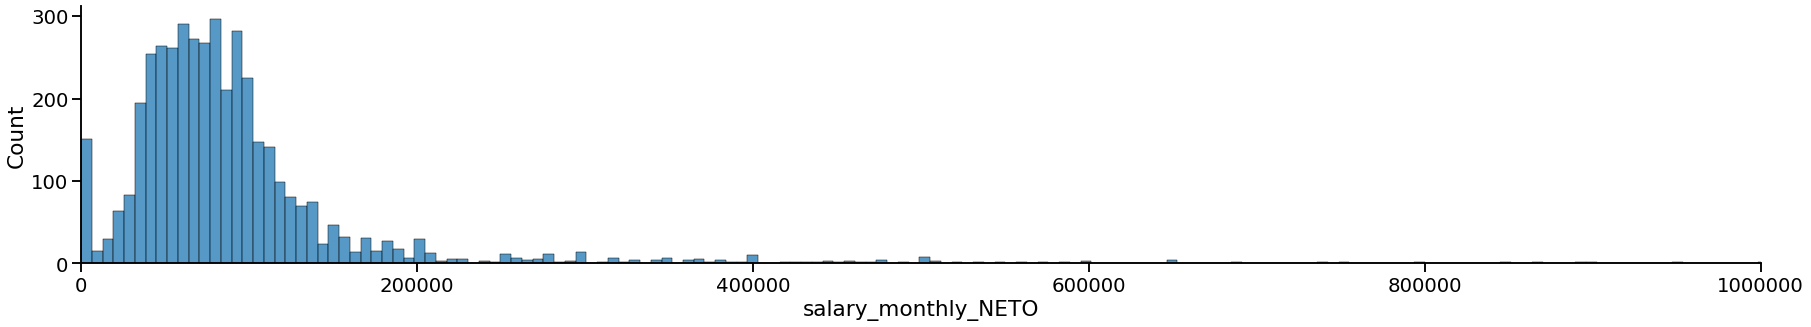

In [ ]:
# Histograma para un primer vistazo de dónde están ubicados los datos
sns.displot(new_df['salary_monthly_NETO'], aspect=5)
# Para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,1000000)

> Encontramos que los datos se encuentran sesgados hacia la izquierda. A su vez, vemos también que los datos se encuentran bastante dispersos hacia la derecha. Queremos considerar valores extremos máximos de salario, pero no los más atípicos que consideramos 'erróneos' para representar la población en este caso de estudio, ya que son montos demasiado grandes. 

In [ ]:
print("Métricas comunes:\n", new_df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s)))

Métricas comunes:
 count       4224.00
mean       93773.74
std       100943.56
min            1.00
25%        51206.75
50%        75441.00
75%       103000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object


> Notamos que la media y la mediana difieren bastante y el máximo mucho más. 
Visualicemos estas dos métricas poniendo como tope distintos valores de salario altos:

In [ ]:
max_salaries = [new_df['salary_monthly_NETO'].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, new_df[new_df['salary_monthly_NETO'] < max_salary]['salary_monthly_NETO'].mean(),
     new_df[new_df['salary_monthly_NETO'] < max_salary]['salary_monthly_NETO'].median())
    for max_salary in max_salaries
]
central_tendency

[(2080000.0, 93303.40735093538, 75382.0),
 (1000000, 91138.85865788852, 75105.0),
 (500000, 86161.90788676085, 75000.0),
 (400000, 83437.57641568157, 75000.0),
 (300000, 79810.48647981406, 74849.0),
 (200000, 75936.3868179082, 73128.0)]

> Para tratar de llegar a una medida que represente la mayor área de ubicación de los datos, y ya que el promedio es más abarcativo que la mediana, trataremos de eliminar los valores extremos para poder calcular un promedio más representativo, acercandolo un poco a la mediana. Para esto utilizaremos los percentiles de una forma más conservadora que minimice la eliminación de sueldos mayores. 



> ***Elección del mínimo***

> Buscamos como referencia el [salario mínimo vital y móvil del año 2020](https://www.boletinoficial.gob.ar/detalleAviso/primera/236294/20201020), con una cifra de ARS 18.900 y visualizamos los percentiles que más se acercan para luego elegir uno.

In [ ]:
print("\nPercentiles:\n", new_df['salary_monthly_NETO'].quantile(
    [.04, .045, .046, .047, .05, .10]
))


Percentiles:
 0.040    13460.000
0.045    18505.775
0.046    19000.000
0.047    20000.000
0.050    21045.000
0.100    35000.000
Name: salary_monthly_NETO, dtype: float64


> Vemos que el más cercano es el percentil 0.046. 


In [ ]:
k_min = .046
percentil_min = new_df['salary_monthly_NETO'].quantile(k_min)

# Calculamos % de eliminación
n_below_min = len(new_df[new_df['salary_monthly_NETO'] < percentil_min])
print("\n% de datos menor que el percentil_min {}: {:.4f}".format(k_min, n_below_min/len(new_df)))

# Creamos un dataset que no contenga los valores extremos menores a este percentil
df_above_min = new_df[new_df['salary_monthly_NETO'] > percentil_min]


% de datos menor que el percentil_min 0.046: 0.0443


> De esta manera, estaríamos desconsiderando por debajo un 4% de personas encuestadas.

***Elección del máximo***

De acuerdo a lo investigado sobre cuales eran los máximos sueldos en 2020, concluímos que es bastante atípico que haya salarios mayores a ARS 475.000 en el dicho año.

Por lo que, apreciando los percentiles que vimos, elegimos el más cercano menor a ese monto, el percentil .987.

De esta manera, como mencionamos antes, estaríamos desconsiderando por debajo un 4% de personas, y por arriba un porcentaje que no llega a 0,1%. Dado que queremos priorizar que hayan sueldos mayores, nos parecen porcentajes razonables. 

In [ ]:
print("\nPercentiles:\n", df_above_min['salary_monthly_NETO'].quantile(
    [.986, .987, .988, .99, .994, .995, .997]
))

k_max = .987
percentil_max = df_above_min['salary_monthly_NETO'].quantile(k_max)

# Calculamos % de eliminación
n_above_max = len(df_above_min[df_above_min['salary_monthly_NETO'] > percentil_max])
print("\n% de datos mayor que el percentil_max {}: {:.4f}\n".format(k_max, n_above_max/len(df)))

# Creamos el dataframe con los outliers de valores altos eliminados
bounded_df = df_above_min[df_above_min['salary_monthly_NETO'] < percentil_max]

# Cantidad de filas en el proceso del dataframe 
print(len(new_df))
print(len(df_above_min))
print(len(bounded_df))

print("\nMétricas comunes luego de eliminación de outliers:\n", bounded_df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s)))
print("\nMedia = {}".format(bounded_df['salary_monthly_NETO'].mean()), 
      "\nMediana = {}".format(bounded_df['salary_monthly_NETO'].median()))


Percentiles:
 0.986    458110.000
0.987    473739.208
0.988    486760.000
0.990    500000.000
0.994    641900.000
0.995    684600.000
0.997    888380.000
Name: salary_monthly_NETO, dtype: float64

% de datos mayor que el percentil_max 0.987: 0.0087

4353
4028
3975

Métricas comunes luego de eliminación de outliers:
 count      3975.00
mean      89641.61
std       58790.49
min       19650.00
25%       54655.00
50%       78000.00
75%      103540.00
max      471408.00
Name: salary_monthly_NETO, dtype: object

Media = 89641.6055773585 
Mediana = 78000.0


In [ ]:
max_salaries = [bounded_df['salary_monthly_NETO'].max(), 400000, 350000, 300000, 200000]
central_tendency = [
    (max_salary, bounded_df[bounded_df['salary_monthly_NETO'] < max_salary]['salary_monthly_NETO'].mean(),
     bounded_df[bounded_df['salary_monthly_NETO'] < max_salary]['salary_monthly_NETO'].median())
    for max_salary in max_salaries
]
central_tendency

[(471408.0, 89545.53954957222, 78000.0),
 (400000, 87405.8868498354, 77200.0),
 (350000, 85606.40320336392, 77000.0),
 (300000, 83655.2431688512, 76000.0),
 (200000, 79682.26514639937, 75000.0)]


---

* Variable **Lenguajes de programación**

Con respecto a esta variable, eliminamos las personas que no pusieron al menos un lenguaje. A su vez, para poder analizar estos datos con claridad, pudiendo apreciar cada lenguaje en particular, en las respuestas de lenguajes múltiples separamos los lenguajes introduciéndolos a una nueva columna de lenguaje singular `programming_language`. Para no perder otra perspectiva de estudio, creamos además una columna que contiene una lista de los valores de la columna `programming_language`, según los lenguajes que responda cada persona. Estas dos columnas crearán más filas de las originales, pero no nos perjudica ya que nuestro foco no implica contar ocurrencias de personas sino ocurrencias de lenguajes.

In [ ]:
# Convertimos la string con los lenguajes separados por comas en una lista de lenguajes
# Removemos las respuestas en las que no aparecen ningún lenguaje, además de espacios y comas finales
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('ninguno', '')
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Creamos una nueva columna con la lista de lenguajes
bounded_df.loc[:, 'cured_programming_languages'] = bounded_df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicamos cada fila del dataframe por cada lenguaje mencionado en cada respuesta
# Solo incluímos en df_lang las columnas quue vamos a analizar luego, así que no duplicamos información innecesaria
df_lang = bounded_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(bounded_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang[:3]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"


In [ ]:
print("Métricas comunes:\n", df_lang['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s)))

Métricas comunes:
 count     12751.00
mean      91955.60
std       60799.03
min       19650.00
25%       55555.00
50%       80000.00
75%      105000.00
max      471408.00
Name: salary_monthly_NETO, dtype: object


#### Lenguajes más populares

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

print("Cantidad de lenguajes totales: {}".format(len(language_count)))
language_count.head(30)

Cantidad de lenguajes totales: 159


,language,frequency
0,javascript,1863
1,sql,1569
2,html,1356
3,python,1046
4,java,1031
5,css,936
6,bash/shell,703
7,php,610
8,typescript,608
9,.net,575


> Veamos los lenguajes mejores pagos hasta la media 91.955

In [ ]:
grouped_0 = df_lang[['programming_language', 'salary_monthly_NETO']].groupby('programming_language').mean()
ordered_0 = grouped_0.sort_values('salary_monthly_NETO', ascending=False)
ordered_0.head(42)

,salary_monthly_NETO
programming_language,
rust,154854.056000
rexx,150000.000000
mongodb,150000.000000
clojure,149987.750000
assembler,136433.462632
objective-c,132540.486486
elixir,132453.750000
graphql,132000.000000
tf,130000.000000


> Notamos que ambas tablas tienen lenguajes en común y otros que no, además de aparecer en distinto orden. 

In [ ]:
# Creamos una lista con los primeros 30 lenguajes más populares en orden descendente
popularity_languages = language_count.language.values[:30].tolist()
# Creamos una lista con los primeros 42 lenguajes más pagos en orden descendente
best_salary_languages = ordered_0.index[:42].tolist()

In [ ]:
# Creamos una lista con los 15 lenguajes mejores pagos dentro de los 30 más populares
intersec_popularity_bestsalary_lang = list(set(popularity_languages).intersection(best_salary_languages))
print(len(intersec_popularity_bestsalary_lang))
intersec_popularity_bestsalary_lang

15


['c',
 'swift',
 'r',
 'kotlin',
 'objective-c',
 'bash/shell',
 'typescript',
 'scala',
 'python',
 'groovy',
 'ruby',
 'assembler',
 'dart',
 'perl',
 'go']

In [ ]:
# Creamos un nuevo dataframe que contengan en la columna programming_language esos lenguajes
filtered_df_lang = df_lang[df_lang.programming_language.isin(intersec_popularity_bestsalary_lang)]
filtered_df_lang.shape

(3467, 5)

(19000.0, 473739.2079999996)

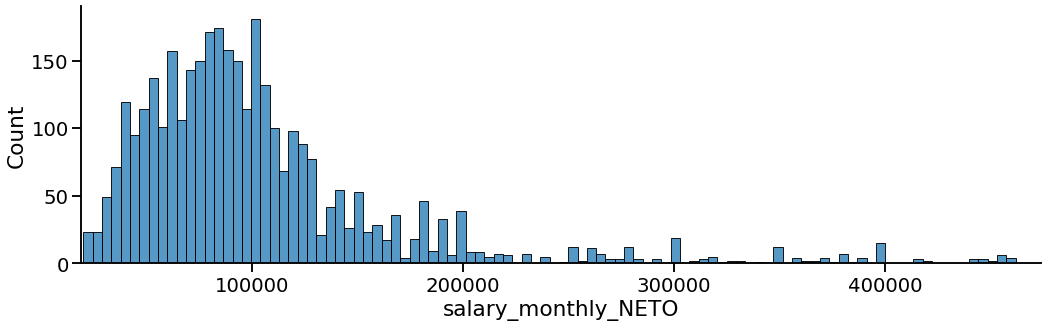

In [ ]:
# Histograma para un primer vistazo de dónde están ubicados los datos
sns.displot(filtered_df_lang['salary_monthly_NETO'], bins=100, aspect=3)
# Para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(percentil_min,percentil_max)

> Creamos una lista de las **frecuencias relativas** de estos lenguajes, y otra lista para ordenarlos por su frecuencia

In [ ]:
language_count_table = filtered_df_lang.programming_language.value_counts(normalize=True)\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'relative_frequency'})

language_count_table

,language,relative_frequency
0,python,0.301702
1,bash/shell,0.202769
2,typescript,0.175368
3,go,0.058552
4,c,0.047015
5,kotlin,0.042111
6,groovy,0.037785
7,ruby,0.030862
8,scala,0.026247
9,swift,0.023075


In [ ]:
# Creamos una lista con las frecuencias relativas
relative_frecuency_lang = language_count_table.relative_frequency.values.tolist()
# Creamos una lista con los lenguajes ordenados por su frecuencia 
langs_order_by_frecuency = language_count_table.language.values.tolist()
print(langs_order_by_frecuency)
relative_frecuency_lang

['python', 'bash/shell', 'typescript', 'go', 'c', 'kotlin', 'groovy', 'ruby', 'scala', 'swift', 'r', 'perl', 'objective-c', 'dart', 'assembler']


[0.3017017594462071,
 0.20276896452264206,
 0.1753677531006634,
 0.05855206230170176,
 0.04701471012402653,
 0.042111335448514566,
 0.037784828381886355,
 0.030862417075281222,
 0.026247476204211133,
 0.02307470435535045,
 0.018748197288722238,
 0.010960484568791463,
 0.010672050764349583,
 0.008653014133256417,
 0.0054802422843957315]

> #### Veamos ahora su **popularidad** gráficamente

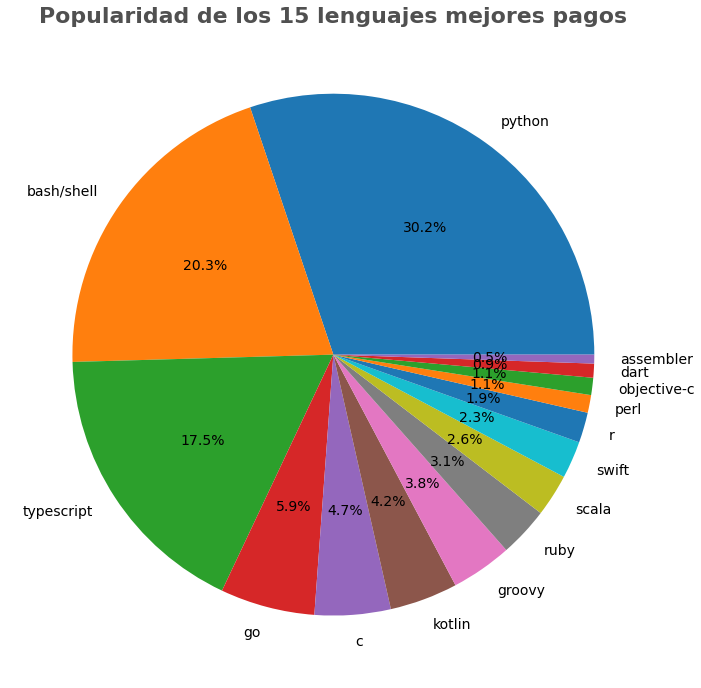

<Figure size 432x288 with 0 Axes>

In [ ]:
colors = sns.color_palette('tab10')
plt.figure(figsize=(12,12))
plt.title('Popularidad de los 15 lenguajes mejores pagos', 
          loc='center', color='#505050', fontsize=22, fontweight='bold')

plt.pie(filtered_df_lang['programming_language'].value_counts(), 
        explode=None, 
        labels=langs_order_by_frecuency, 
        colors=colors, 
        textprops={"fontsize":14},
        autopct='%.1f%%')

plt.show()
#plt.savefig('popularidad_15leng_mejorespagos.png', dpi=1000, bbox_inches="tight")

#### Podemos concluír con este gráfico que 

#### **¡Los mejores salarios los ganan, en su mayoría (30.2%), programadores que saben Python!**

#### Veamos las **distribuciones salariales** comparando la **media** y la **mediana** de estos **lenguajes**, ordenados de izquierda a derecha y de arriba hacia abajo por su frecuencia en orden descendente:

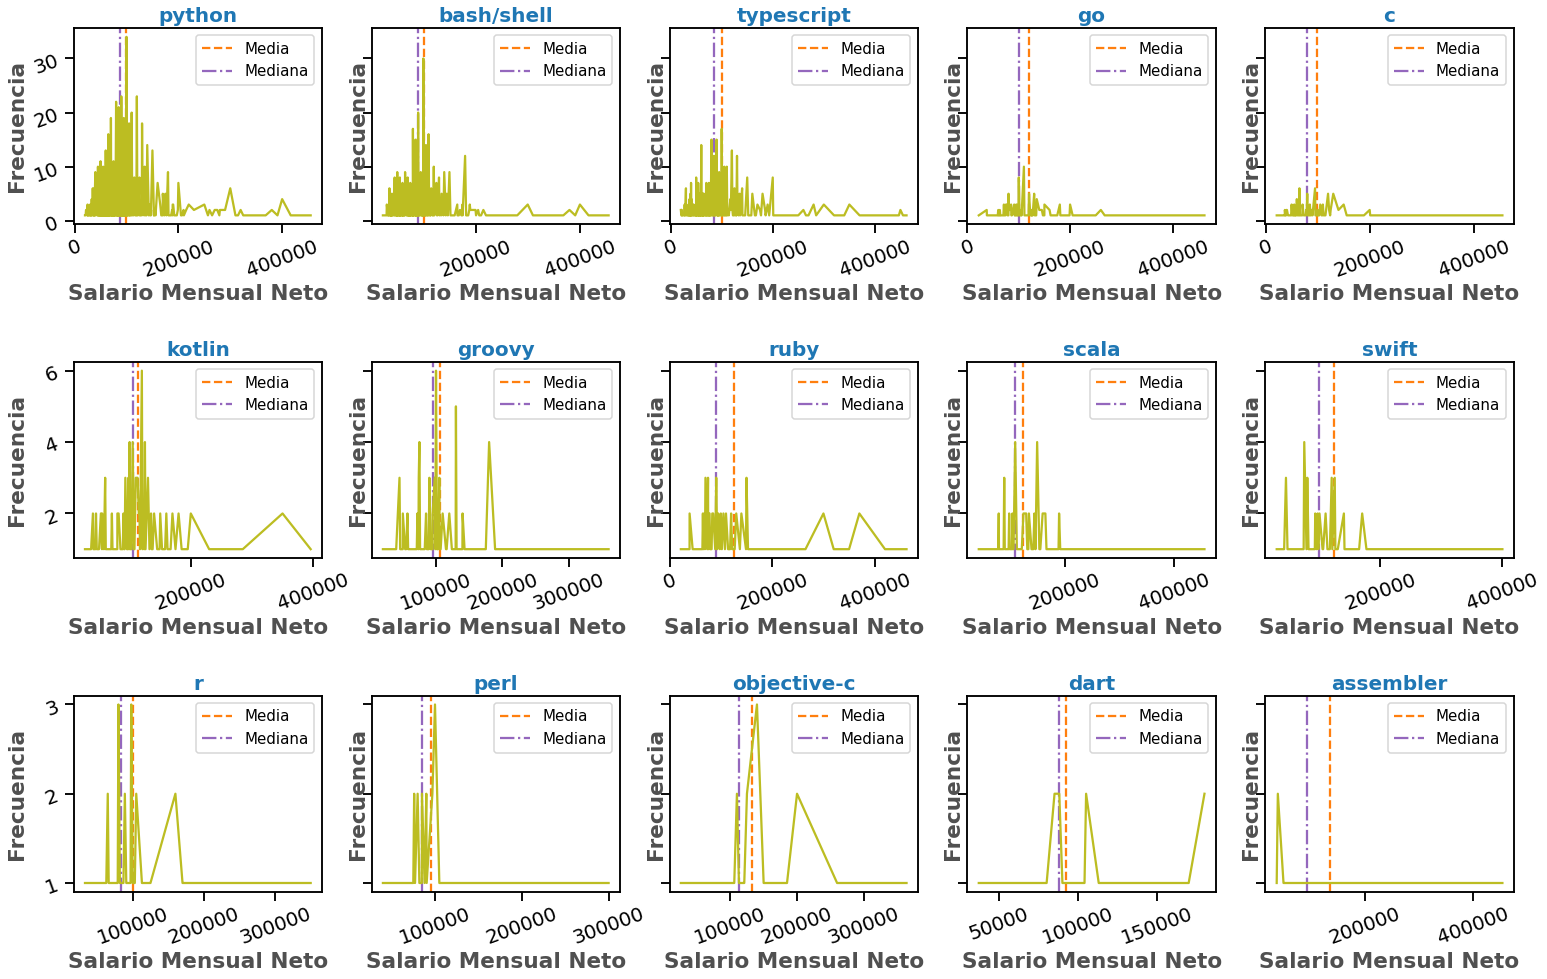

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,12), sharey='row')

fig.subplots_adjust(left=1, right=2, hspace=0.7, bottom=2.3, top=3.3)
fig.align_ylabels(ax)
fig.align_xlabels(ax)

ls = langs_order_by_frecuency
idx = 0
while idx + 1 < len(ls):
  for i in range(0,3):
    for y in range(0,5):
        df_equal_lang = filtered_df_lang[filtered_df_lang['programming_language'] == ls[idx]]
        salary_lang = df_equal_lang['salary_monthly_NETO'].value_counts()

        ax[i,y].set_title(ls[idx], color='tab:blue', fontsize=20, fontweight='bold')
        ax[i,y].tick_params(labelrotation=20)
        ax[i,y].set(xlabel='Salario Mensual Neto', ylabel='Frecuencia')

        ax[i,y].xaxis.label.set_color('#505050')
        ax[i,y].yaxis.label.set_color('#505050')

        ax[i,y].xaxis.label.set_weight('bold')
        ax[i,y].yaxis.label.set_weight('bold')
        
        ax[i,y].axvline(df_equal_lang['salary_monthly_NETO'].mean(), color='tab:orange',
                    linestyle='--', label='Media')
        ax[i,y].axvline(df_equal_lang['salary_monthly_NETO'].median(), color='tab:purple',
                    linestyle='-.', label='Mediana')

        sns.lineplot(data=salary_lang,
                    x=salary_lang.index, 
                    y=salary_lang.values,
                    ax=ax[i,y],
                    color='tab:olive',
        )
        ax[i,y].ticklabel_format(style='plain', axis='x')
        ax[i,y].ticklabel_format(style='plain', axis='y')

        ax[i,y].legend(fontsize=15)
        
        idx = idx + 1

fig.show()
#plt.savefig('distribucion_salario_por_leng_con_metricas.png', dpi=1000, bbox_inches="tight")

> Graficamos los lenguajes con su **promedio salarial neto** y la **frecuencia relativa** de su popularidad, ordenados de mayor a menor por ésta última. Utilizamos la métrica de la **media** porque ya hemos eliminado los eventos que consideramos atípicos y el promedio es más abarcativo que otras métricas.

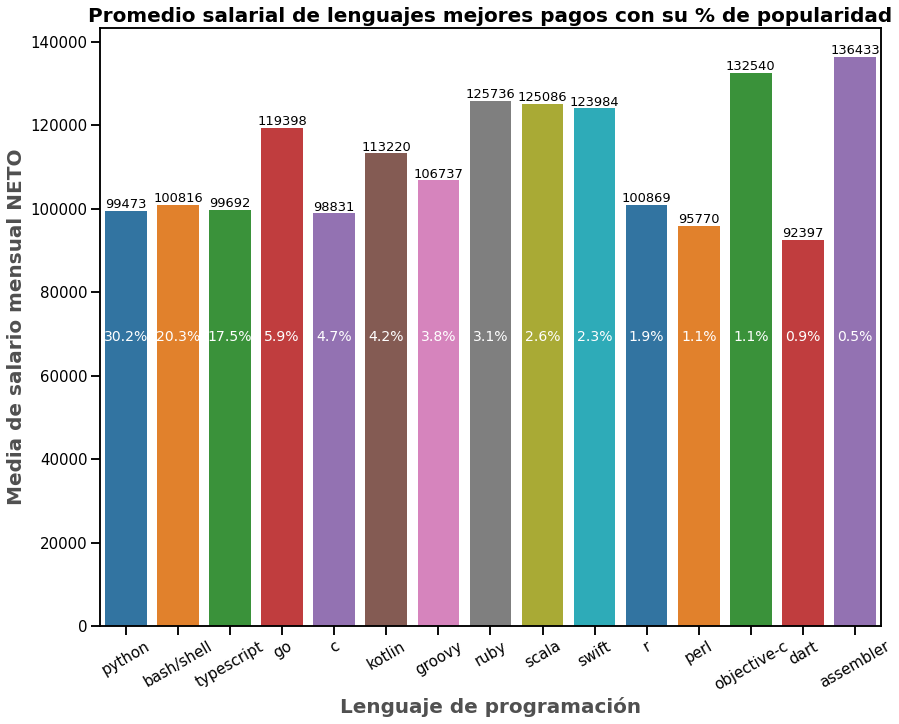

In [ ]:
fig = plt.figure(figsize=(14,11))

order = langs_order_by_frecuency
interested_languages = filtered_df_lang['programming_language']

# Obtenemos la máxima media de todos los lenguajes
max_mean = filtered_df_lang[['programming_language', 'salary_monthly_NETO']].groupby(
    'programming_language').mean().sort_values('salary_monthly_NETO', ascending=False).values[0][0]

ax = sns.barplot(y=filtered_df_lang['salary_monthly_NETO'], 
             x=interested_languages,
             estimator=np.mean, ci=None,
             palette='tab10', order=order,
)

plt.title('Promedio salarial de lenguajes mejores pagos con su % de popularidad', 
            loc='center', color='black', fontsize=20, fontweight='bold')
plt.ylabel("Media de salario mensual NETO", 
           size=20, fontweight='bold', color='#505050')
plt.xlabel("Lenguaje de programación", 
           size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# rotamos los elementos del eje x
plt.xticks(rotation=30)
# agregamos la etiqueta de la Media al tope de cada barra 
for p in ax.containers:
     ax.bar_label(p, fmt='%.0f', label_type='edge', fontsize=13)
# agregamos la frecuencia relativa (%) en cada barra
for i in range(0, len(order)):
    plt.text(i, max_mean/2, '{:.1%}'.format(relative_frecuency_lang[i]), 
              ha='center', va='baseline', fontsize=14, color='white')

plt.savefig('media_salarial_leng_con_frecuencia.png', dpi=1000, bbox_inches="tight")


#### Con este gráfico podemos apreciar también algo que nos resulta a nosotrxs más representativo, y es:

#### **El lenguaje con mejor balance entre popularidad y media salarial es Go!**

> Graficamos con un **boxplot** para ver las métricas de la **mediana**, el **rango intercuartil** y los datos extremos de cada lenguaje (medidas de centralización)

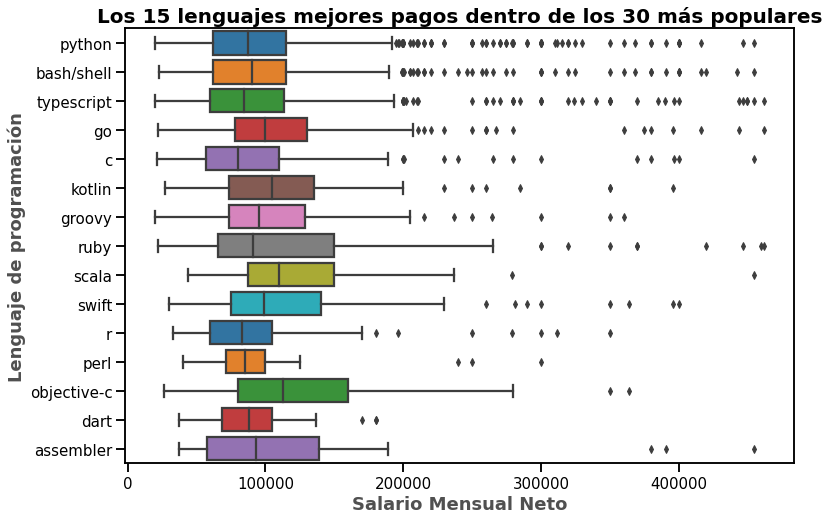

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language', 
            palette='tab10', order=langs_order_by_frecuency)

plt.title('Los 15 lenguajes mejores pagos dentro de los 30 más populares', 
            loc='center', color='black', fontsize=20, fontweight='bold')

plt.ylabel("Lenguaje de programación", 
           size=18, fontweight='bold', color='#505050')
plt.xlabel("Salario Mensual Neto", 
           size=18, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ticklabel_format(style='plain', axis='x')
plt.show()
#plt.savefig('boxplot_15_leng_mejores_pagos.png', dpi=1000, bbox_inches="tight")

#### Con esta otra visión de métricas observamos que 

#### **¡La mayor mediana salarial dentro de los lenguajes más frecuentes le corresponde a Objective-c!**

#### Por otro lado, teniendo en cuenta el análisis previo, resulta interesante investigar qué lenguajes aparecen en el último cuartil de los salarios mejores pagos, es decir:

#### **¿Cuál es el lenguaje más frecuente, dentro del 25% mayor de los mejores sueldos?**

In [ ]:
k = filtered_df_lang['salary_monthly_NETO'].quantile(.75)

# Creamos el dataframe con los registros con sueldo mayor al percentil k
max_df = filtered_df_lang[filtered_df_lang['salary_monthly_NETO'] > k]
len(max_df)

842

In [ ]:
salary_col = 'salary_monthly_NETO'

> Veamos cómo difieren la **media** y la **mediana** en el dataset en el dataset sin filtros y en aquel filtrado por el último cuartil en el salario

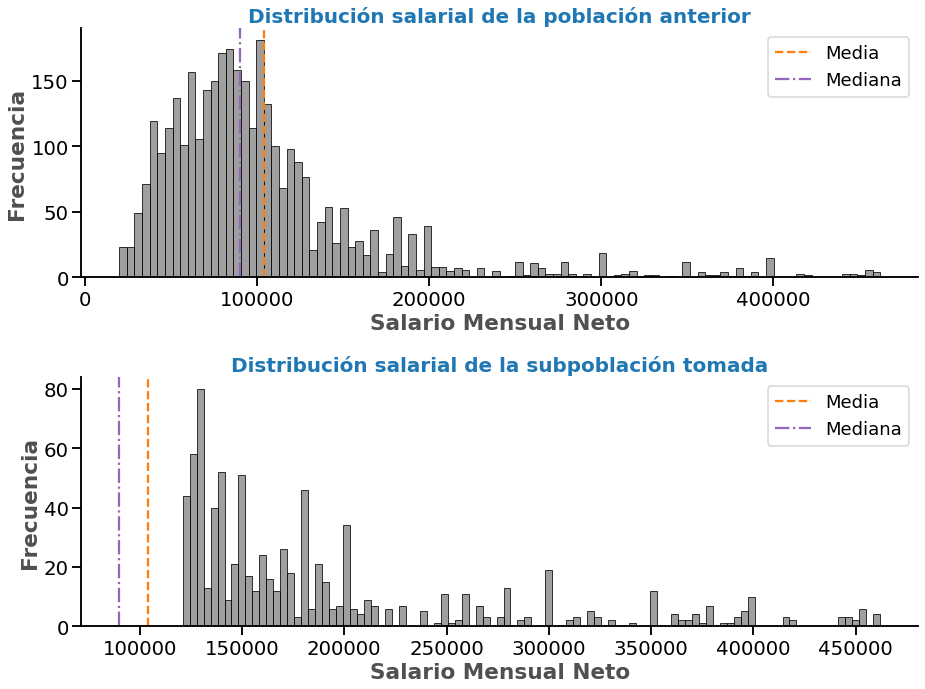

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 11))
fig.subplots_adjust(hspace=0.4)

sns.histplot(filtered_df_lang[salary_col], bins=100, ax=axes[0], color='tab:gray')
sns.histplot(max_df[salary_col], bins=100, ax=axes[1], color='tab:gray')

axes[0].set_title('Distribución salarial de la población anterior', color='tab:blue', fontsize=20, fontweight='bold')
axes[1].set_title('Distribución salarial de la subpoblación tomada', color='tab:blue', fontsize=20, fontweight='bold')

for i in range(0,2):
  axes[i].axvline(filtered_df_lang[salary_col].mean(), color='tab:orange',
              linestyle='--', label='Media')
  axes[i].axvline(filtered_df_lang[salary_col].median(), color='tab:purple',
              linestyle='-.', label='Mediana')

  axes[i].set(xlabel='Salario Mensual Neto', ylabel='Frecuencia')
  axes[i].xaxis.label.set_color('#505050')
  axes[i].yaxis.label.set_color('#505050')
  axes[i].xaxis.label.set_weight('bold')
  axes[i].yaxis.label.set_weight('bold')
  axes[i].legend(fontsize=18)

sns.despine()

In [ ]:
# Calculamos su frecuencia
frecuency_max_salaries = max_df.programming_language.value_counts()\
                        .reset_index()\
                        .rename(columns={'index': 'language', 'programming_language': 'frequency'})

frecuency_max_salaries

,language,frequency
0,python,221
1,bash/shell,153
2,typescript,130
3,go,66
4,kotlin,51
5,scala,42
6,groovy,38
7,ruby,37
8,c,33
9,swift,27


In [ ]:
# Creamos una lista de los lenguajes del último cuartil ordenados de forma descendente por su popularidad
popularity_languages_max_list = frecuency_max_salaries.language.values.tolist()
print(popularity_languages_max_list)

['python', 'bash/shell', 'typescript', 'go', 'kotlin', 'scala', 'groovy', 'ruby', 'c', 'swift', 'objective-c', 'r', 'dart', 'assembler', 'perl']


In [ ]:
import collections
print(langs_order_by_frecuency)
print(popularity_languages_max_list)
# Chequeamos si las dos listas tienen los mismos elementos, independientemente del orden
collections.Counter(langs_order_by_frecuency) == collections.Counter(popularity_languages_max_list)

['python', 'bash/shell', 'typescript', 'go', 'c', 'kotlin', 'groovy', 'ruby', 'scala', 'swift', 'r', 'perl', 'objective-c', 'dart', 'assembler']
['python', 'bash/shell', 'typescript', 'go', 'kotlin', 'scala', 'groovy', 'ruby', 'c', 'swift', 'objective-c', 'r', 'dart', 'assembler', 'perl']


True

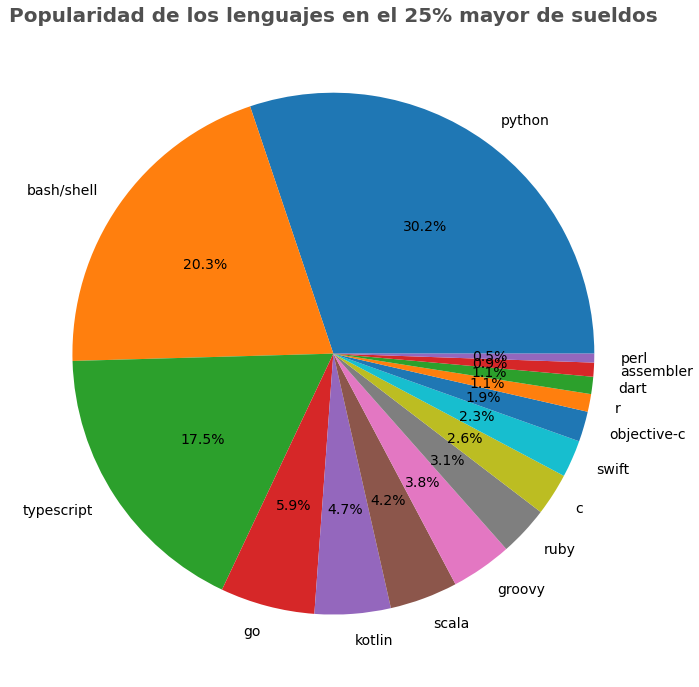

<Figure size 432x288 with 0 Axes>

In [ ]:
labels = popularity_languages_max_list
colors = sns.color_palette('tab10')
plt.figure(figsize=(12,12))
plt.title('Popularidad de los lenguajes en el 25% mayor de sueldos', 
          loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.pie(filtered_df_lang['programming_language'].value_counts(), 
        explode=None, 
        labels=labels, 
        colors=colors, 
        textprops={"fontsize":14},
        autopct='%.1f%%')

plt.show()
#plt.savefig('popularidad_15leng_ultimo_cuartil.png', dpi=1000, bbox_inches="tight")


#### Apreciando este gráfico concluímos que el lenguaje más frecuente en los mayores salarios (último cuartil) sigue siendo Python en este foco de análisis, es decir

#### **¡El 25% de los mejores salarios los ganan, en su mayoría (30.2%), programadores que saben Python!**

> Notar que en este apartado no mostraremos un gráfico de barras con medidas de tendencia central. Esto se debe a que, como hemos visto al comparar la **media** y la **mediana** de esta subpoblación, no son medidas representativas en este caso puesto que difieren mucho ya que estamos considerando los datos más atípicos seleccionados.

> En su caso, presentaremos un gráfico de barras calculando su **desviación estándar**:

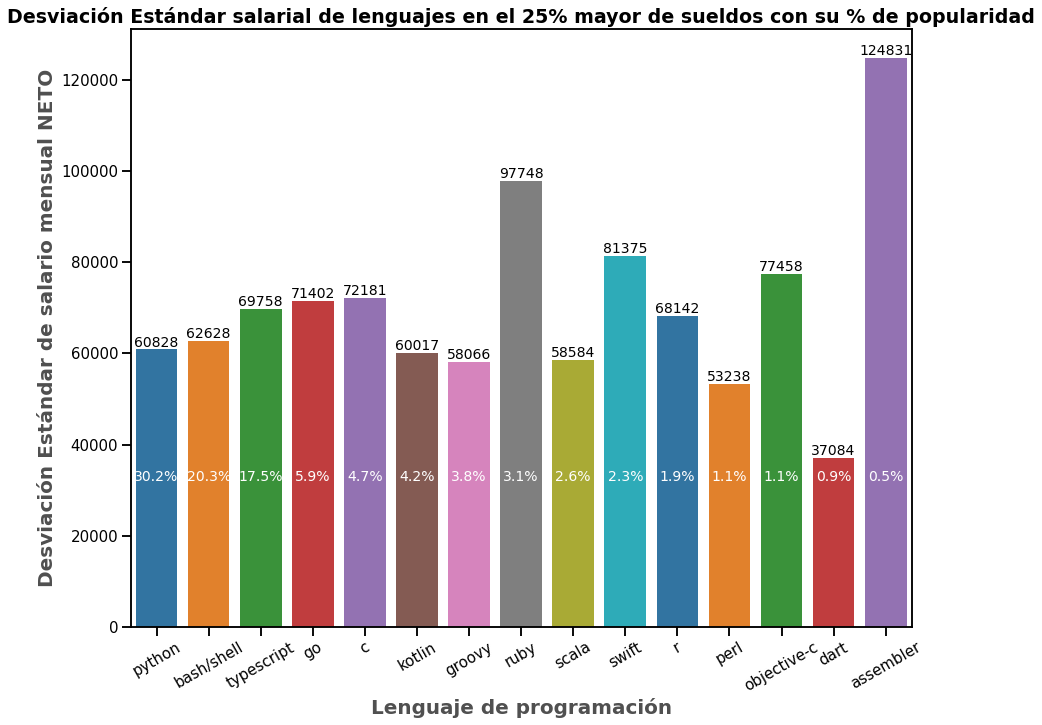

In [ ]:
fig = plt.figure(figsize=(14,11))

order = langs_order_by_frecuency
interested_languages = filtered_df_lang['programming_language']

# Obtenemos la máxima media de todos los lenguajes
max_std = filtered_df_lang[['programming_language', 'salary_monthly_NETO']].groupby(
    'programming_language').std().sort_values('salary_monthly_NETO', ascending=False).values[0][0]

ax = sns.barplot(y=filtered_df_lang['salary_monthly_NETO'], 
             x=interested_languages,
             estimator=np.std, ci=None,
             palette='tab10', order=order,
)

plt.title('Desviación Estándar salarial de lenguajes en el 25% mayor de sueldos con su % de popularidad', 
            loc='center', color='black', fontsize=19, fontweight='bold')
plt.ylabel("Desviación Estándar de salario mensual NETO", 
           size=20, fontweight='bold', color='#505050')
plt.xlabel("Lenguaje de programación", 
           size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# rotamos los elementos del eje x
plt.xticks(rotation=30)
# agregamos la etiqueta de la Media al tope de cada barra 
for p in ax.containers:
     ax.bar_label(p, fmt='%.0f', label_type='edge', fontsize=14)
# agregamos la frecuencia relativa (%) en cada barra
for i in range(0, len(order)):
    plt.text(i, max_std/4, '{:.1%}'.format(relative_frecuency_lang[i]), 
              ha='center', va='baseline', fontsize=14, color='white')
    
#plt.savefig('desviacion_standar_y_popularidad_ultimo_cuartil.png', dpi=1000, bbox_inches="tight")

> **Gráfico de caja** para lenguajes más comunes en los sueldos del último cuartil:

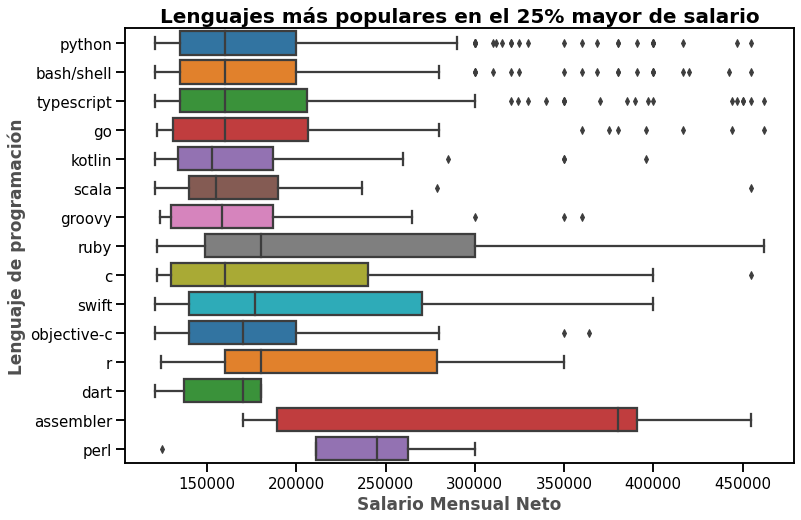

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=max_df, x='salary_monthly_NETO', y='programming_language', 
            palette='tab10', order=popularity_languages_max_list)

plt.title('Lenguajes más populares en el 25% mayor de salario', 
            loc='center', color='black', fontsize=20, fontweight='bold')

plt.ylabel("Lenguaje de programación", 
           size=17, fontweight='bold', color='#505050')
plt.xlabel("Salario Mensual Neto", 
           size=17, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### En esta oportunidad, viendo este gráfico encontramos: 

#### **¡La mayor mediana salarial dentro del 25% mejor pago de los lenguajes más frecuentes le corresponde a Assembler!**

#### Cabe aclarar que este resultado si bien muestra casos bastante interesantes al ser atípicos, no es el más representativo.

#### Como conclusión final, reiteramos que los resultados más representativos son:

#### **El lenguaje con mejor balance entre popularidad y media salarial es Go!**
#### **¡Los mejores salarios los ganan, en su mayoría (30.2%), programadores que saben Python!**

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [ ]:
df.dtypes

Lenguaje       object
Porcentaje    float64
Muestra        object
dtype: object

En el ejercicio 1 elegimos 3 variables aleatorias o columnas principales:

* Salario Neto Mensual -> Si bien estamos trabajando con un conjunto finito de datos, se la puede pensar como una variable continua numérica, ya que quizá pudo haber valores dentro del rango que no se haya respondido en esta encuesta. Pero técnicamente es una Discreta numérica.
* Lenguajes de programación -> Discreta categórica
* Puesto -> Discreta categórica



Exploramos la base de datos con histogramas y tablas de distribución de frecuencias, con visualización y comparación de las métricas más comunes. A su vez, con algunos gráficos de barras, de cajas y de tortas para comparar métricas y frecuencia de los lenguajes y salario, y cosas más simples como acceder a los primeros registros o acceder a los valores únicos de una variable para visualizar las respuestas que hay. Además, para ver la correlación entre varias variables utilizamos gráficos de puntos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
initial_df = pd.read_csv(url)

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




>Las herramientas que pueden utilizarse para estudiar la distribución y  el comportamiento de los datos son: Estadística descriptiva, Histogramas, Tablas, análisis de correlación, mapas de calor, gráficos de barra, gráficos de distribución conjunta, boxplots, entre otros.

> Seleccion de columnas

In [4]:
selected_columns = ['profile_years_experience', 'salary_monthly_NETO', 'work_years_in_company', 'work_role', 'profile_studies_level',]
df_a = initial_df[selected_columns]
df_a.head()

,profile_years_experience,salary_monthly_NETO,work_years_in_company,work_role,profile_studies_level
0,3.0,43000.0,3.0,Consultant,Universitario
1,5.0,63000.0,2.0,Developer,Universitario
2,2.0,127000.0,0.0,Infosec,Secundario
3,15.0,102000.0,15.0,SysAdmin / DevOps / SRE,Posgrado
4,9.0,106000.0,6.0,Developer,Universitario


> Estadistica descriptiva de las variables

* **Años de experiencia**

In [5]:
df_a['profile_years_experience'].describe()

count    6095.000000
mean        8.930861
std         7.161094
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max       115.000000
Name: profile_years_experience, dtype: float64

[Text(0.5, 1.0, 'Boxplot de "años de experiencia"')]

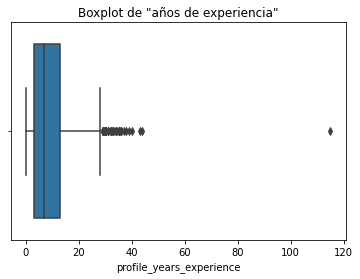

In [6]:
sns.boxplot(x=df_a['profile_years_experience']).set(title='Boxplot de "años de experiencia"')

> Se ve un valor muy atípico como máximo el cual debe ser filtrado, usamos el criterio de los cuartiles para filtrar datos atipicos

In [7]:
df_a=df_a[(df_a['profile_years_experience'] < 35)] # Q3+Q2*3 con el criterios de los cuartiles puedo filtrar datos atipicos
print('Años de experiencia máximo informado:',df_a['profile_years_experience'].max())



Años de experiencia máximo informado: 34.0


[Text(0.5, 1.0, 'Boxplot de "años de experiencia"')]

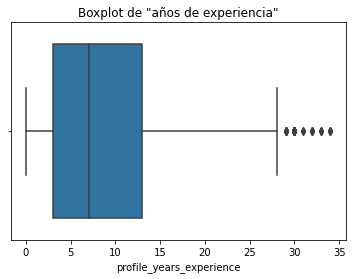

In [8]:
sns.boxplot(x=df_a['profile_years_experience']).set(title='Boxplot de "años de experiencia"')

* **Salario NETO**

In [9]:
df_a['salary_monthly_NETO'].describe()

count    5.864000e+03
mean     9.470568e+04
std      9.614374e+04
min      1.000000e+00
25%      5.125850e+04
50%      7.760000e+04
75%      1.060000e+05
max      2.080000e+06
Name: salary_monthly_NETO, dtype: float64

[Text(0.5, 1.0, 'Boxplot de "salario neto"')]

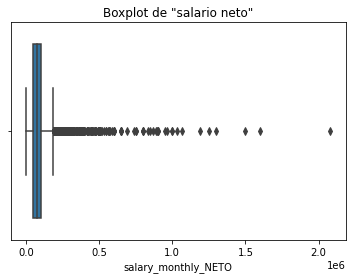

In [17]:
sns.boxplot(x=df_a['salary_monthly_NETO']).set(title='Boxplot de "salario neto"')

> Usamos el mismo filtro de los cuartiles

In [11]:
# Eliminamos los outliers de salario como hicimos en el punto 1
k_min = .046
k_max = .987
percentil_min_a = df_a['salary_monthly_NETO'].quantile(k_min)
percentil_max_a = df_a['salary_monthly_NETO'].quantile(k_max)

# Creamos el dataframe con los outliers de valores extremos eliminados
df_above_min_a = df_a[df_a['salary_monthly_NETO'] > percentil_min_a]
bounded_df_a = df_above_min_a[df_above_min_a['salary_monthly_NETO'] < percentil_max_a]

print('Salario máximo informado:', bounded_df_a['salary_monthly_NETO'].max())

Salario máximo informado: 444000.0


[Text(0.5, 1.0, 'Boxplot de "salario neto"')]

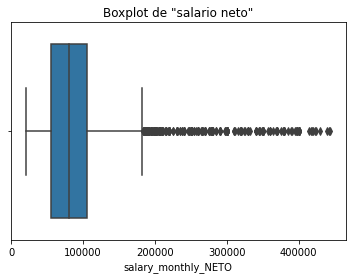

In [12]:
sns.boxplot(x=bounded_df_a['salary_monthly_NETO']).set(title='Boxplot de "salario neto"')

> Para analizar y evaluar la **intersección** de la realización de ambas variables. usamos **jointplot**

<Figure size 720x360 with 0 Axes>

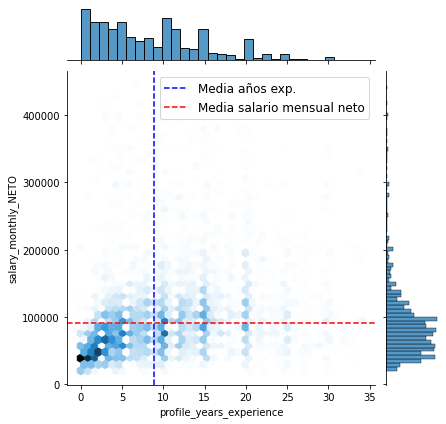

In [13]:
fig = plt.figure(figsize=(10,5))
g = sns.jointplot(
    data=bounded_df_a, 
    x='profile_years_experience', 
    y='salary_monthly_NETO', 
    kind='hex'
)
plt.axvline(bounded_df_a['profile_years_experience'].mean(), color='blue', linestyle='--', label='Media años exp.')
plt.axhline(bounded_df_a['salary_monthly_NETO'].mean(), color='red', linestyle='--', label='Media salario mensual neto')
plt.legend(fontsize=12)

>  Observando el gráfico se puede notar la mayor densidad entre los primeros años de experiencia y sueldos menores al promedio

<Figure size 1296x864 with 0 Axes>

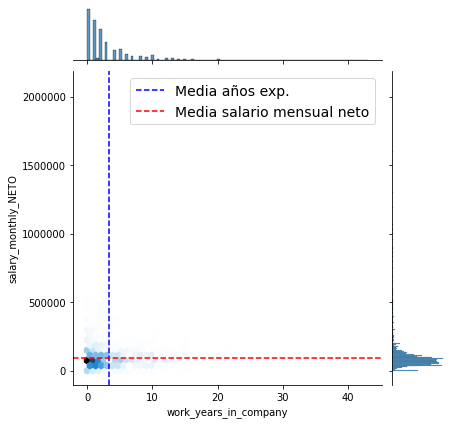

In [20]:
fig = plt.figure(figsize=(18,12))
g = sns.jointplot(
    data=df_a,
    x='work_years_in_company', 
    y='salary_monthly_NETO', 
    kind='hex'
)
plt.axvline(bounded_df_a['work_years_in_company'].mean(), color='blue', linestyle='--', label='Media años exp.')
plt.axhline(bounded_df_a['salary_monthly_NETO'].mean(), color='red', linestyle='--', label='Media salario mensual neto')
plt.legend(fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

> Observando el gráfico se puede determinar que la gente que tiene muchos años de experiencia en la misma compania no crece en salario

> **Gráficos de puntos**

In [21]:
df_a['profile_studies_level'].value_counts()

Universitario    4117
Terciario        1134
Secundario        449
Posgrado          340
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

> Vamos a usar dos elementos de la variable nivel de estudio para compararlas en cuanto a su salario y años de experiencia

In [22]:
lista = ['Universitario', 'Posgrado']

In [23]:
df_a_grafico = bounded_df_a[bounded_df_a.profile_studies_level.isin(lista)]

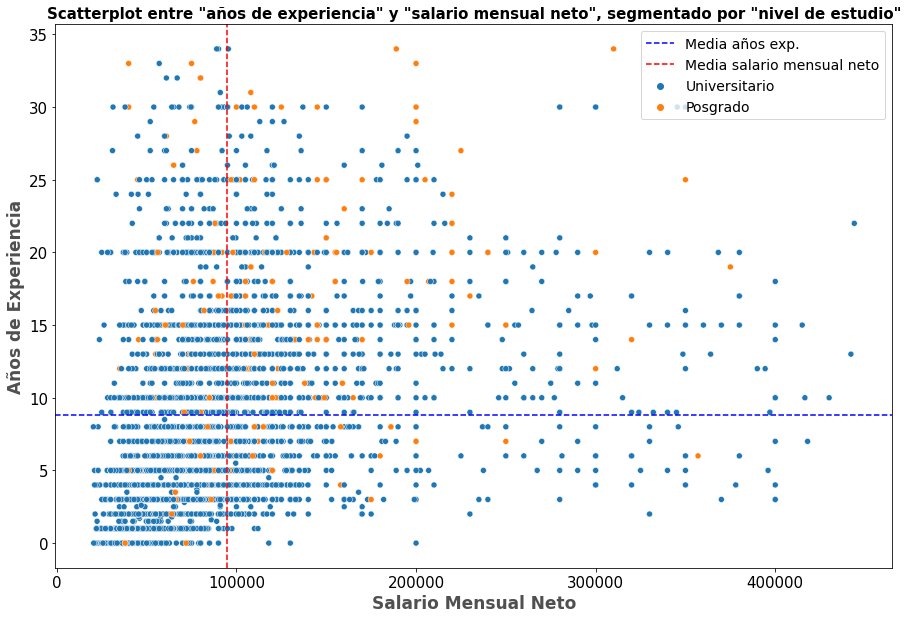

In [35]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(
    data=df_a_grafico,
    y='profile_years_experience', 
    x='salary_monthly_NETO', 
    hue='profile_studies_level',
    legend='full'
)
plt.title('Scatterplot entre "años de experiencia" y "salario mensual neto", segmentado por "nivel de estudio"',
      loc='center', color='black', fontsize=15, weight='bold')

plt.xlabel("Salario Mensual Neto", 
           size=17, fontweight='bold', color='#505050')
plt.ylabel("Años de Experiencia", 
           size=17, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axhline(df_a['profile_years_experience'].mean(), color='blue', linestyle='--', label='Media años exp.')
plt.axvline(df_a['salary_monthly_NETO'].mean(), color='red', linestyle='--', label='Media salario mensual neto')
plt.legend(fontsize=14)

> Si bien se pueden ver puntos que representan cada uno de los niveles de estudio a lo largo de todo el rango de salarios, se aprecia cierta tendecia entre la interseccion de las medias para la categoria universitario y para la categoria postgrado se ve una dispersion muy grande pero la mayor cantidad de valores  estan en la mitad derecho donde estan los maximos salarios .

> **Tabla de contingencias** (normalizada) con las variables de puesto laboral y nivel de estudio, acompañada de un **heatmap**.

In [36]:
orden = bounded_df_a['work_role'].value_counts()[:20]
lista2 = (orden.index[:20]).tolist()

In [37]:
df_a_map = bounded_df_a[bounded_df_a.work_role.isin(lista2)]
df_a_map

,profile_years_experience,salary_monthly_NETO,work_years_in_company,work_role,profile_studies_level
0,3.0,43000.0,3.0,Consultant,Universitario
1,5.0,63000.0,2.0,Developer,Universitario
2,2.0,127000.0,0.0,Infosec,Secundario
3,15.0,102000.0,15.0,SysAdmin / DevOps / SRE,Posgrado
4,9.0,106000.0,6.0,Developer,Universitario
...,...,...,...,...,...
6088,13.0,56450.0,0.0,SysAdmin / DevOps / SRE,Secundario
6089,10.0,130000.0,3.0,SysAdmin / DevOps / SRE,Universitario
6090,13.0,97000.0,6.0,Developer,Terciario
6091,12.0,71000.0,5.0,SysAdmin / DevOps / SRE,Universitario


In [39]:
tab_cont = pd.crosstab(
    df_a_map['work_role'],
    df_a_map['profile_studies_level'],
    margins=True,
    margins_name='Subtotales',
    normalize=True
).round(4)
tab_cont

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario,Subtotales
work_role,,,,,,,,
Architect,0.0006,0.0000,0.0027,0.0000,0.0018,0.0043,0.0213,0.0307
BI Analyst / Data Analyst,0.0002,0.0000,0.0023,0.0000,0.0006,0.0051,0.0166,0.0248
Business Analyst,0.0000,0.0000,0.0027,0.0000,0.0004,0.0020,0.0149,0.0199
Consultant,0.0000,0.0000,0.0016,0.0000,0.0016,0.0043,0.0172,0.0246
DBA,0.0000,0.0000,0.0008,0.0000,0.0004,0.0014,0.0068,0.0094
Data Scientist / Data Engineer,0.0012,0.0002,0.0039,0.0000,0.0010,0.0018,0.0168,0.0248
Designer,0.0000,0.0000,0.0002,0.0000,0.0008,0.0014,0.0065,0.0088
Developer,0.0014,0.0002,0.0066,0.0002,0.0227,0.0796,0.3136,0.4242
HelpDesk,0.0000,0.0000,0.0000,0.0000,0.0086,0.0123,0.0135,0.0344


Text(0.5, 46.0, 'Nivel de Estudio')

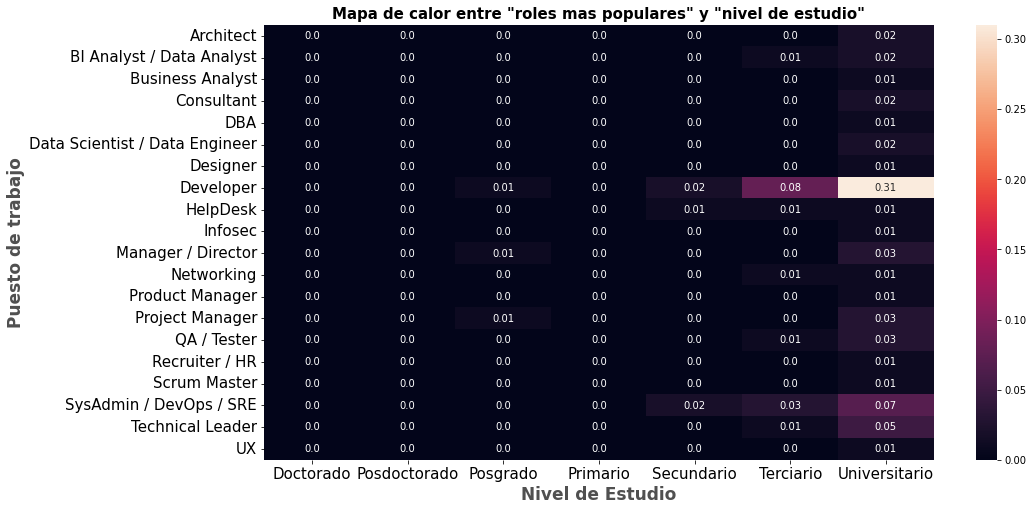

In [46]:
tab_cont_graf = pd.crosstab(
    df_a_map['work_role'],
    df_a_map['profile_studies_level'],
    normalize=True)

fig = plt.figure(figsize=(15,8))

plt.title(
    'Mapa de calor entre "roles mas populares" y "nivel de estudio"', 
    loc='center', color='black', fontsize=15, fontweight='bold'
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.heatmap(
    tab_cont_graf.round(2),
    annot=True,
    fmt='0'
)

plt.ylabel("Puesto de trabajo", 
           size=17, fontweight='bold', color='#505050')
plt.xlabel("Nivel de Estudio", 
           size=17, fontweight='bold', color='#505050')


> La proporción más significativa se halla en el par (Developer, Universitario), seguido de (Developer, Terciario). Claramente esto está marcado por la mayor proporción total de respuestas de personas que trabajan siendo desarrolladores.


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



> Veamos un gráfico de correlación para darnos un primer vistazo de estas dos variables:

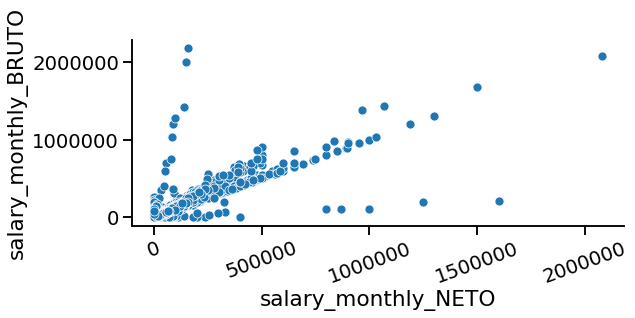

In [ ]:
sns.pairplot(data=initial_df, 
             y_vars=['salary_monthly_BRUTO'], 
             x_vars=['salary_monthly_NETO'], 
             aspect=2, height=4)

plt.xticks(rotation=20)

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

> A simple vista se puede apreciar una **relación directa importante** entre ambas variables.

In [ ]:
# Eliminamos valores nulos
data = initial_df.loc[initial_df['salary_monthly_BRUTO'].notna()].dropna()

# Generamos nueva columna calculada como la diferencia entre sueldo bruto y sueldo neto
data['salary_monthly_DESCUENTOS'] = data.salary_monthly_BRUTO - data.salary_monthly_NETO 

matcov = np.cov(data.salary_monthly_BRUTO,data.salary_monthly_NETO)
print('matriz de varianza covarianza:\n', matcov, '\n')

corr = np.corrcoef(data.salary_monthly_BRUTO,data.salary_monthly_NETO)
print('matriz de correlaciones:\n', corr, '\n')

print('correlación entra ambas variables: ', corr[0,1], '\n')

matriz de varianza covarianza:
 [[5.52428113e+10 4.13057541e+10]
 [4.13057541e+10 3.43351703e+10]] 

matriz de correlaciones:
 [[1.         0.94842516]
 [0.94842516 1.        ]] 

correlación entra ambas variables:  0.9484251617822252 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


> Al tener una correlación casi igual implica que hay una relación directa entre ambas variables => se puede excluir la columna **Salario Mensual BRUTO**

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Universitario    3991
Terciario        1106
Secundario        434
Posgrado          317
Doctorado          29
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64


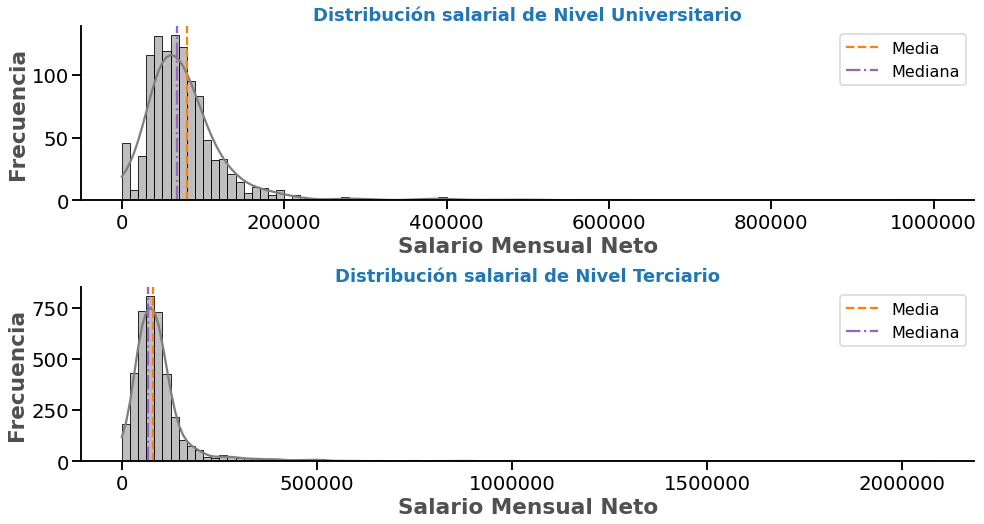

In [ ]:
# Creamos un nuevo dataframe con las variables a estudiar
study_level = pd.DataFrame(initial_df, columns = ["salary_monthly_NETO", "profile_studies_level"])
# Eliminamos los registros con valores nulos en la columna "salary_monthly_NETO"
study_level_notna = study_level.dropna(subset=["salary_monthly_NETO"])
# Vemos la frecuencia de nivel de estudios
print(study_level_notna["profile_studies_level"].value_counts())
# Creamos dos nuevos dataframes uno para nivel de estudio Terciario y otro para Universitario, los más numerosos
study_level_terciario = study_level_notna.query("profile_studies_level == 'Terciario'")
study_level_universitario = study_level_notna.query("profile_studies_level == 'Universitario'")

# Armamos un histograma para cada dataframe
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

sns.histplot(study_level_terciario['salary_monthly_NETO'], bins=100, ax=axes[0], color='tab:gray', kde=True)
sns.histplot(study_level_universitario['salary_monthly_NETO'], bins=100, ax=axes[1], color='tab:gray', kde=True)

axes[0].set_title('Distribución salarial de Nivel Universitario', color='tab:blue', fontsize=18, fontweight='bold')
axes[1].set_title('Distribución salarial de Nivel Terciario', color='tab:blue', fontsize=18, fontweight='bold')

for i in range(0,2):
    axes[i].axvline(study_level_terciario['salary_monthly_NETO'].mean(), color='tab:orange',
                linestyle='--', label='Media')
    axes[i].axvline(study_level_terciario['salary_monthly_NETO'].median(), color='tab:purple',
                linestyle='-.', label='Mediana')

    axes[i].set(xlabel='Salario Mensual Neto', ylabel='Frecuencia')
    
    axes[i].xaxis.label.set_color('#505050')
    axes[i].yaxis.label.set_color('#505050')
    
    axes[i].xaxis.label.set_weight('bold')
    axes[i].yaxis.label.set_weight('bold')
    
    axes[i].ticklabel_format(style='plain', axis='x')
    axes[i].ticklabel_format(style='plain', axis='y')

    axes[i].legend(fontsize=16)

sns.despine()

##¿Considera que ambas variables son independientes?

Se puede apreciar que el **sueldo NETO** es dependiente del **nivel de estudio**: el sueldo medio es mayor para nivel de estudio **Universitario**.

##¿Qué analizaría al respecto?

Analizaría la variación de la media.

##Calcule medidas de centralización y dispersión para cada subpoblación

In [ ]:
# Medida de tendencia central
print("Media de salario neto p/ Terciarios", study_level_terciario['salary_monthly_NETO'].mean())
print("Media de salario neto p/ Universitarios", study_level_universitario['salary_monthly_NETO'].mean())
# Medida de dispersión
print("\nCoeficiente de variación salario neto p/ Terciarios", sp.stats.variation(study_level_terciario['salary_monthly_NETO']))
print("Coeficiente de variación salario neto p/ Universitarios", sp.stats.variation(study_level_universitario['salary_monthly_NETO']))

Media de salario neto p/ Terciarios 80814.43378390597
Media de salario neto p/ Universitarios 97410.22441368081

Coeficiente de variación salario neto p/ Terciarios 0.9034527458439101
Coeficiente de variación salario neto p/ Universitarios 1.0167771683464748


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Elejimos las variables:

* Numéricas: "Salario mensual neto" y "Años de experiencia en puesto actual" 

(`'salary_monthly_NETO'` y `'work_years_in_current_position'`)
* Categórica: "Género" 

(`'profile_gender'`)

In [ ]:
# Eliminamos los outliers de salario como hicimos antes
k_min = .046
k_max = .987
percentil_min_d = initial_df['salary_monthly_NETO'].quantile(k_min)
percentil_max_d = initial_df['salary_monthly_NETO'].quantile(k_max)

# Creamos el dataframe con los outliers de valores extremos eliminados
df_above_min_d = initial_df[initial_df['salary_monthly_NETO'] > percentil_min_d]
bounded_df_d = df_above_min_d[df_above_min_d['salary_monthly_NETO'] < percentil_max_d]

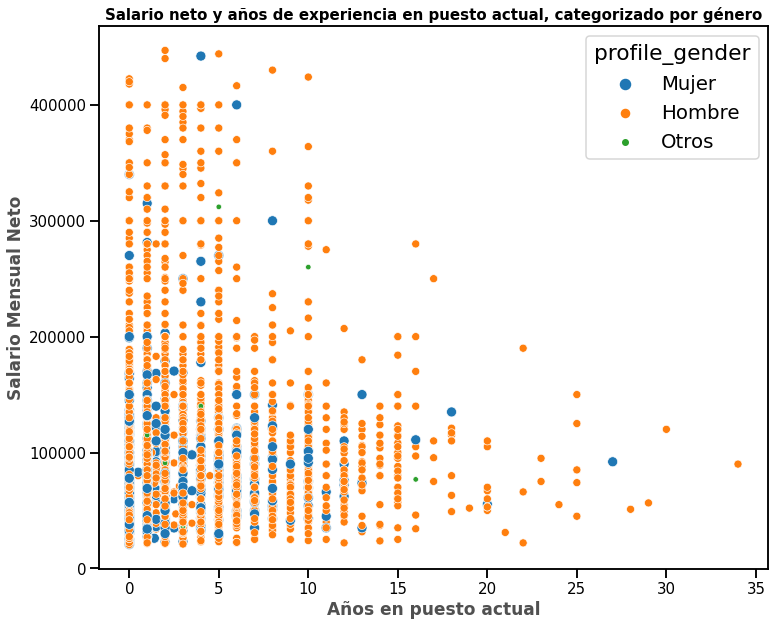

In [ ]:
plt.figure(figsize=(12,10))

plt.ticklabel_format(style='plain', axis='x')

plt.title(
    'Salario neto y años de experiencia en puesto actual, categorizado por género', 
    loc='center', color='black', fontsize=15, fontweight='bold'
)

plt.ylabel("Salario Mensual Neto", 
           size=17, fontweight='bold', color='#505050')
plt.xlabel("Años en puesto actual", 
           size=17, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.scatterplot(data=bounded_df_d, 
                x='work_years_in_current_position', 
                y='salary_monthly_NETO',
                hue='profile_gender',
                size='profile_gender',
                sizes=(30, 100), legend="full")

#plt.savefig('correlacion_salario_neto_exper_puesto_actual_genero.png', dpi=1000, bbox_inches="tight")

> Apreciaciones:
* La mayoría de la gente encuestada tiene una experiencia en el puesto actual de su momento entre 0 y 5 años.
* La mayoría de la gente encuestada tiene un salario neto mensual entre ARS 19.000 y ARS 200.000.
* Para todos los géneros dentro de su mismo género hay pocos casos de demasiada experiencia laboral.
* Los casos de demasiada experiencia laboral, no presentan una suma de dinero muy grande.
* El género "Otros" se presenta muy poco en el ámbito tecnológico, aún teniendo bastantes años de experiencia en un puesto como en el caso de 10 y aproximadamente 16 años.
* El género "Mujer", se encuentra mucho más presente que el anterior, y hay algunos casos extremos mayores a la suma de ARS 200.000.
* El género "Hombre" aparece notablemente más que los géneros anteriormente nombrados, y hay más casos de salarios atípicos que de demasiada experiencia. También es el género que presenta el mayor salario entre los casos atípicos de todos los géneros.